In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

pd.set_option('display.max_columns', None)

In [4]:
!pip install opendatasets --quiet

In [9]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/schirmerchad/bostonhoustingmlnd')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: akshaygoel4356
Your Kaggle Key: ··········


100%|██████████| 4.35k/4.35k [00:00<00:00, 2.44MB/s]

In [19]:
house=pd.read_csv('/content/HousingData.csv')

In [20]:
house

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [21]:
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [22]:
house.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [23]:
house.shape

(506, 14)

In [24]:
house.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [25]:
house.dropna(how='any',axis=0,inplace=True)

In [26]:
house.shape

(394, 14)

In [27]:
house.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [28]:
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [29]:
house.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.188075,0.391552,-0.051970,0.416160,-0.227170,0.341311,-0.365052,0.608667,0.560841,0.265428,-0.386254,0.461906,-0.397230
ZN,-0.188075,1.000000,-0.521256,-0.033357,-0.515660,0.343210,-0.568174,0.645359,-0.298773,-0.305768,-0.422164,0.169894,-0.415041,0.406822
INDUS,0.391552,-0.521256,1.000000,0.049820,0.762737,-0.403068,0.642387,-0.696569,0.591944,0.734204,0.395691,-0.344788,0.598156,-0.510829
CHAS,-0.051970,-0.033357,0.049820,1.000000,0.076661,0.095308,0.072644,-0.095037,0.014102,-0.026513,-0.104995,0.068913,-0.037113,0.173701
NOX,0.416160,-0.515660,0.762737,0.076661,1.000000,-0.316563,0.732540,-0.768137,0.628170,0.679824,0.210216,-0.384257,0.593655,-0.459054
RM,-0.227170,0.343210,-0.403068,0.095308,-0.316563,1.000000,-0.248670,0.218713,-0.236057,-0.320561,-0.390686,0.123320,-0.636226,0.723951
AGE,0.341311,-0.568174,0.642387,0.072644,0.732540,-0.248670,1.000000,-0.753547,0.443585,0.504472,0.264968,-0.281990,0.601137,-0.407470
DIS,-0.365052,0.645359,-0.696569,-0.095037,-0.768137,0.218713,-0.753547,1.000000,-0.477075,-0.529603,-0.228840,0.285168,-0.505036,0.279547
RAD,0.608667,-0.298773,0.591944,0.014102,0.628170,-0.236057,0.443585,-0.477075,1.000000,0.900000,0.441949,-0.444135,0.510868,-0.416638
TAX,0.560841,-0.305768,0.734204,-0.026513,0.679824,-0.320561,0.504472,-0.529603,0.900000,1.000000,0.446961,-0.435457,0.572218,-0.508864


<AxesSubplot:>

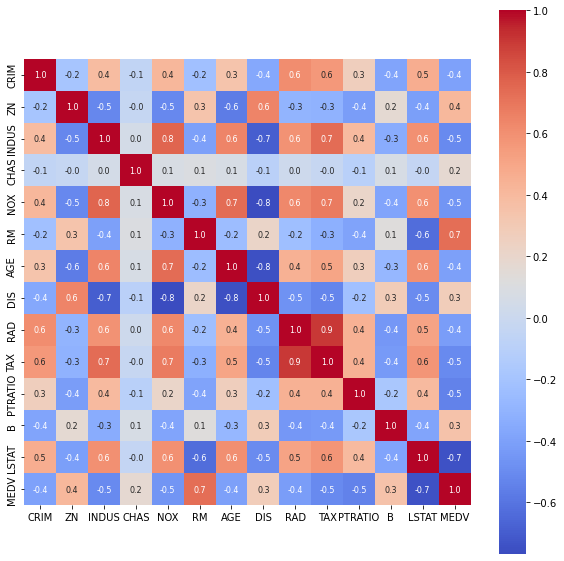

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(house.corr(),cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='coolwarm')

In [52]:
x_train,x_test,y_train,y_test=train_test_split(house.iloc[:,0:-1],house.iloc[:,-1],test_size=0.2,random_state=45)

In [53]:
print(x_train.shape)

(315, 13)


In [54]:
##model training

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lr=LinearRegression()

In [57]:
lr.fit(x_train,y_train)

LinearRegression()

In [58]:
y_pred=lr.predict(x_test)

In [59]:
metrics.r2_score(y_test,y_pred)

0.720574876650247

In [60]:
y_pred

array([22.18197444, 16.73929257, 15.22926685, 27.28557001, 21.65465427,
       23.99209235, 19.59200237, 23.94767501, 17.17568656, 22.84593496,
       20.0922356 , 21.64643728, 30.03931552, 24.79941073, 22.05719724,
       28.77831192, 20.83181965, 17.08706006, 17.0028421 , 21.427802  ,
       28.36537831, 20.09494325, 18.1930522 , 18.25492801, 23.15462617,
       27.08330846, 27.6458259 , 22.75022601, 22.34020818, 23.86820736,
       19.66300407, 39.88039872, 26.8781489 , 20.82664606, 15.96638583,
       19.40787955, 25.45046753, 34.32641127, 24.91907933, 19.36214934,
       15.82684844, 42.043759  , 14.32485694, 39.01554134, 30.72085661,
       31.80843382, 20.18485713, 28.38040734, 12.19937919, 28.04169548,
       26.18954876, 27.56577316, 26.09700726, 18.5042402 ,  8.73760737,
       33.47183761, 23.16121783, 21.8940979 , 17.9105806 , 21.12744542,
       14.39798368, 27.8678295 , 13.25882962, 17.32308246, 17.33338196,
       31.83915382, 17.74625815, 20.31055398, 30.47742877, 31.39

In [61]:
y_test

45     19.3
495    23.1
142    13.4
269    20.7
333    22.2
       ... 
331    17.1
86     22.5
117    19.2
494    24.5
230    24.3
Name: MEDV, Length: 79, dtype: float64

In [62]:
import xgboost as xg

In [63]:
d=xg.XGBRegressor()

In [65]:
d.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [66]:
y_pred1=d.predict(x_test)

In [67]:
metrics.r2_score(y_test,y_pred1)

0.823787084547422

In [68]:
##xgb regressor performs better on house price prediction model

In [72]:
x_test.iloc[:,0]

45     0.17142
495    0.17899
142    3.32105
269    0.09065
333    0.05083
        ...   
331    0.05023
86     0.05188
117    0.15098
494    0.27957
230    0.53700
Name: CRIM, Length: 79, dtype: float64